In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [23]:
ammonia = pd.read_csv('./results/ammonia_anr_lr_0_h2_lr_0_wacc_0.077_clean.csv')
heat = pd.read_csv('./results/process_heat_anr_lr_0_h2_lr_0_wacc_0.077_clean.csv')
refining = pd.read_csv('./results/refining_anr_lr_0_h2_lr_0_wacc_0.077_clean.csv')
ammonia = ammonia[['Demand (MT H2/day)', 'Breakeven NG price ($/MMBtu)']]
ammonia['Industry'] = 'Ammonia'
heat = heat[['Demand (MT H2/day)', 'Breakeven NG price ($/MMBtu)']]
heat['Industry'] = 'Process heat'
refining = refining[['Demand (MT H2/day)', 'Breakeven price ($/MMBtu)']]
refining['Industry'] = 'Refining'
refining.rename(columns={'Breakeven price ($/MMBtu)':'Breakeven NG price ($/MMBtu)'}, inplace=True)
total = pd.concat([ammonia, heat, refining], ignore_index=True)
total

,Demand (MT H2/day),Breakeven NG price ($/MMBtu),Industry
0,5441.2,26.7,Ammonia
1,1403.5,26.8,Ammonia
2,1521.1,27.3,Ammonia
3,615.3,27.3,Ammonia
4,1057.8,27.5,Ammonia
...,...,...,...
369,9.2,33.4,Refining
370,3.9,39.2,Refining
371,3.1,49.5,Refining
372,2.7,56.9,Refining


(0.0, 50.0)

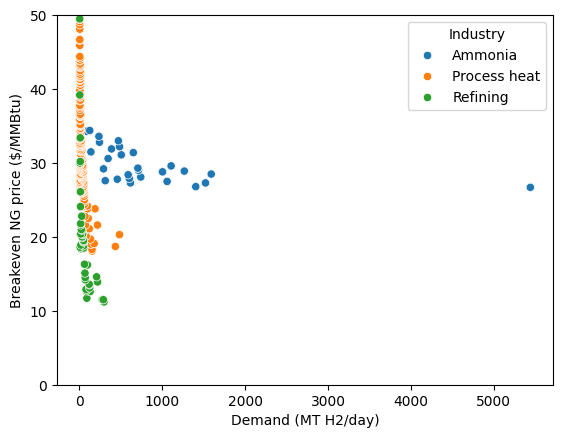

In [24]:
import seaborn as sns 
ax = sns.scatterplot(data=total, x='Demand (MT H2/day)', y='Breakeven NG price ($/MMBtu)', hue='Industry')
ax.set_ylim(0,50)

#sns.relplot(data=total, col='Industry', x='Demand (MT H2/day)', y='Breakeven NG price ($/MMBtu)', hue='Industry')
#plt.savefig('./results/lcoh_htse.png')

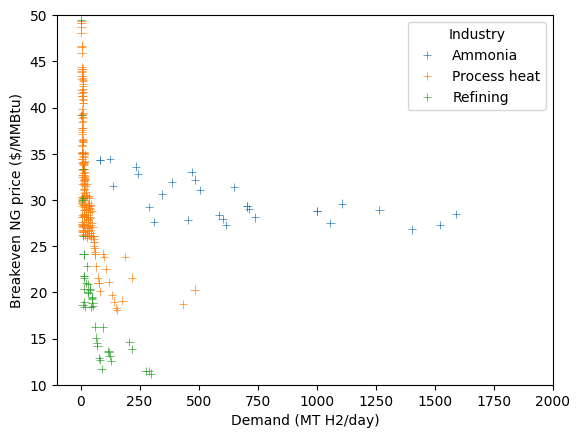

In [25]:
ax = sns.scatterplot(data=total, x='Demand (MT H2/day)', y='Breakeven NG price ($/MMBtu)', hue='Industry', marker='+')
ax.set_ylim(10,50)
ax.set_xlim(-100,2000)
plt.savefig('./results/be_demand_full.png')

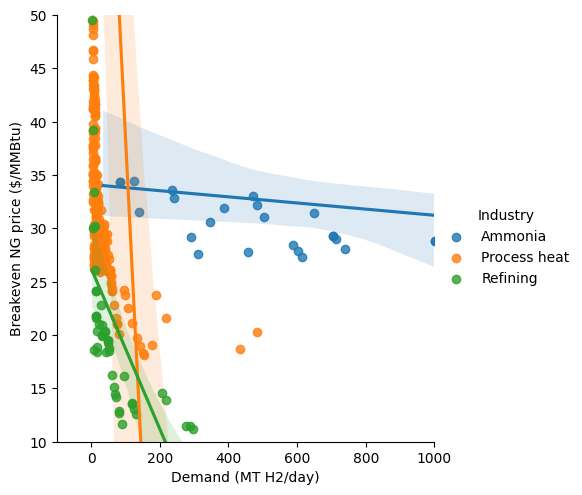

In [26]:
g = sns.lmplot(data=total, x='Demand (MT H2/day)', y='Breakeven NG price ($/MMBtu)', hue='Industry')
g.set(ylim = (10,50))
g.set(xlim=(-100,1000))
plt.savefig('./results/be_demand_zoom.png')